In [1]:
!pip install prophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet

In [5]:
# Load data
train = pd.read_csv('train.csv')
store = pd.read_csv('store.csv')


/tmp/ipython-input-5-2574561463.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


In [6]:

df = pd.merge(train, store, on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Data Cleaning and Preprocessing

In [7]:
# Convert Date to datetime format so that python can read it
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Remove all the stores that are closed
df = df[df['Open'] == 1]

#  We Drop rows with null values for better data analysis
df.dropna(inplace=True)

/tmp/ipython-input-8-3090875340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [9]:
df.sort_values('Date', inplace=True)

In [10]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1016090,1111,3,2013-01-02,5097,505,1,0,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1015326,347,3,2013-01-02,3802,292,1,0,0,1,d,c,9360.0,7.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1015330,351,3,2013-01-02,4390,423,1,0,0,1,a,a,5290.0,11.0,2012.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
1015335,356,3,2013-01-02,5053,433,1,0,0,1,d,c,8970.0,12.0,2007.0,1,22.0,2012.0,"Feb,May,Aug,Nov"
1015340,361,3,2013-01-02,5027,577,1,0,0,1,c,c,4490.0,5.0,2014.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


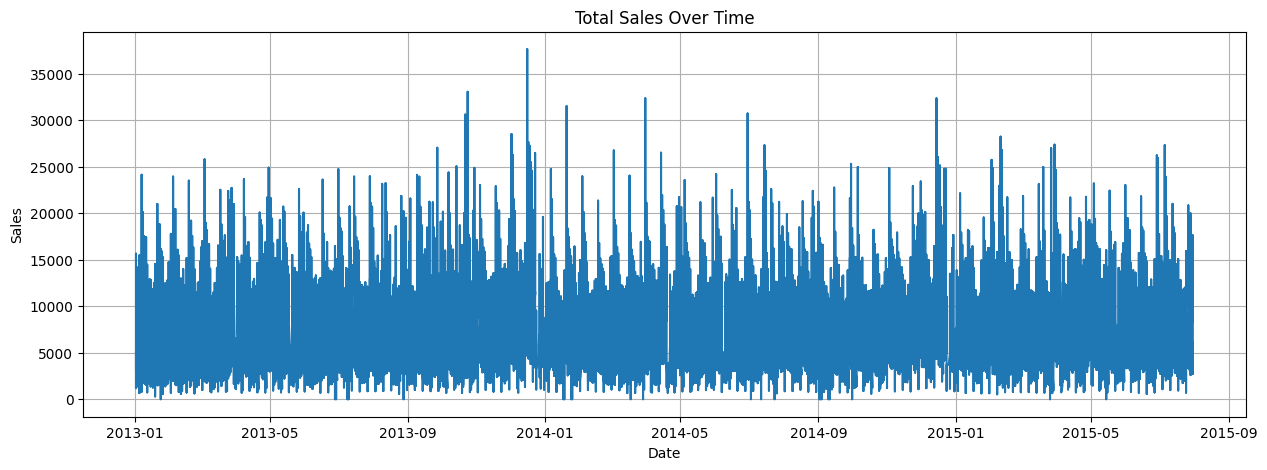

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['Sales'])
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()
# graph between sales in different time periods,the frequent and sharp ups and downs show the sales are highly variable over time.

([<matplotlib.axis.XTick at 0x7849d97a6550>,
 [Text(0, 0, 'No Promo'), Text(1, 0, 'Promo')])

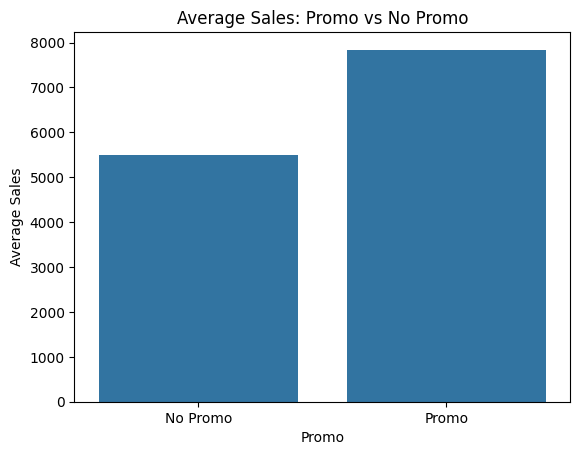

In [17]:
promo_sales = df.groupby('Promo')['Sales'].mean().reset_index()
#calculates the average sales for stores that have a promotion (Promo is 1) and stores that do not have a promotion (Promo is 0).
sns.barplot(x='Promo', y='Sales', data=promo_sales)
plt.title("Average Sales: Promo vs No Promo")
plt.ylabel("Average Sales")
plt.xticks([0, 1], ['No Promo', 'Promo'])


In [18]:
#extracts specific components from the Date column and adds them as new columns in your dataset.
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [20]:
# Use these inputs to learn and predict future sales
features = ['Promo', 'DayOfWeek', 'Month', 'Year']
X = df[features]
y = df['Sales']

In [25]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1830.2283861985409
RMSE: 2422.1372436611846
R2 Score: 0.19497411334420056


In [22]:
df['CompetitionDistance'].isnull().sum()


np.int64(0)

In [23]:
# Fill missing values with median (safer)
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)


/tmp/ipython-input-23-1234209637.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)


In [24]:
features = ['Promo', 'DayOfWeek', 'Month', 'Year', 'CompetitionDistance']
X = df[features]


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R2 Score:", round(r2, 4))


MAE: 1830.23
RMSE: 2422.14
R2 Score: 0.195


In [30]:
df_prophet = df[['Date', 'Sales']].copy()
df_prophet.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)


In [31]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiweizqzu/qhq_1_8o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiweizqzu/s_b9lt3c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65832', 'data', 'file=/tmp/tmpiweizqzu/qhq_1_8o.json', 'init=/tmp/tmpiweizqzu/s_b9lt3c.json', 'output', 'file=/tmp/tmpiweizqzu/prophet_modelwk196gej/prophet_model-20250727213334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:33:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
future = model.make_future_dataframe(periods=90)


In [33]:
forecast = model.predict(future)


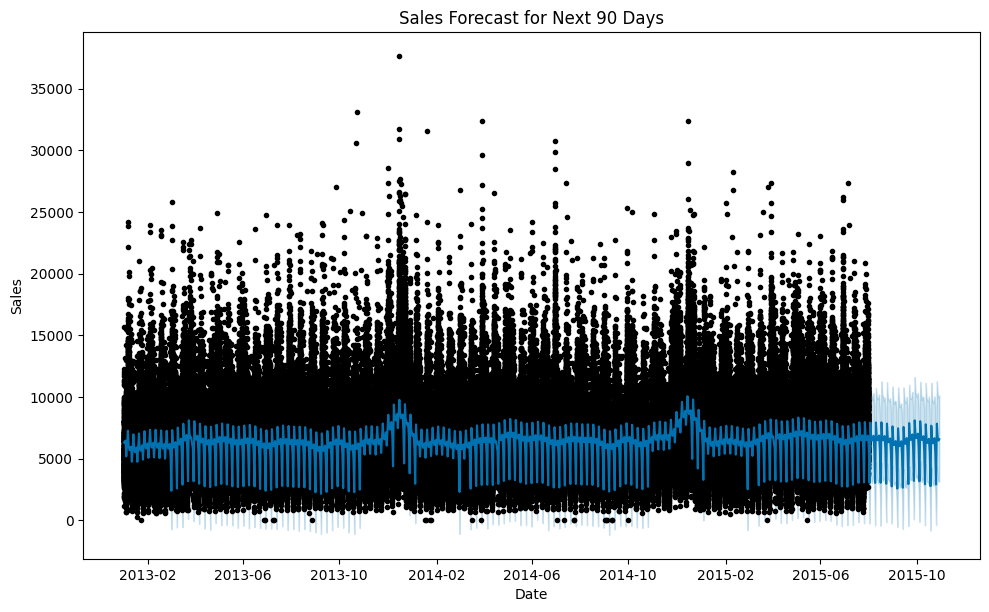

In [38]:
model.plot(forecast)
plt.title("Sales Forecast for Next 90 Days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.show()
##forecasted period is on the right side the light blue area
#black dots represent the past data and they are too many because we have a lot of past data availaible


In [37]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
977,2015-10-20,6557.037985,3311.453048,9846.876998
978,2015-10-21,6241.992370,2913.594930,9557.609411
979,2015-10-22,6331.365299,2826.036393,9503.400496
980,2015-10-23,6660.930137,3301.908997,10051.334885
981,2015-10-24,5506.851289,2326.828610,9019.862486
982,2015-10-25,2900.159192,-384.937565,6720.088004
983,2015-10-26,7836.667418,4334.824421,11278.479911
984,2015-10-27,6753.811555,3288.364339,10280.653365
985,2015-10-28,6464.701471,3141.254052,9914.709761
986,2015-10-29,6574.262506,3151.445843,10099.943646


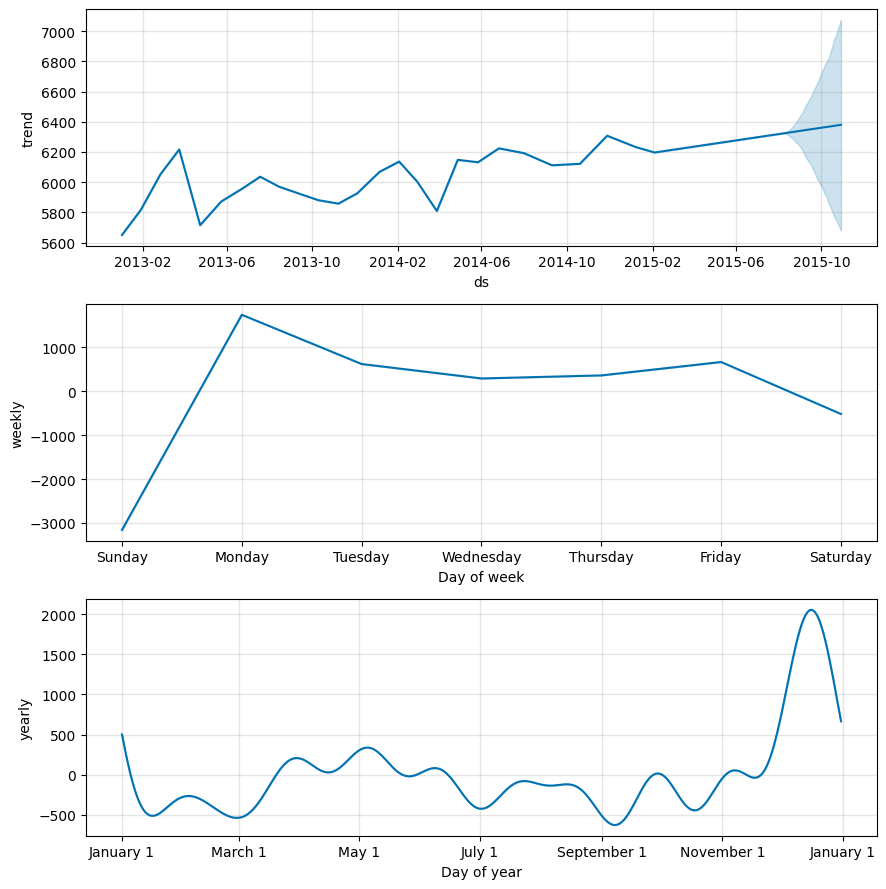

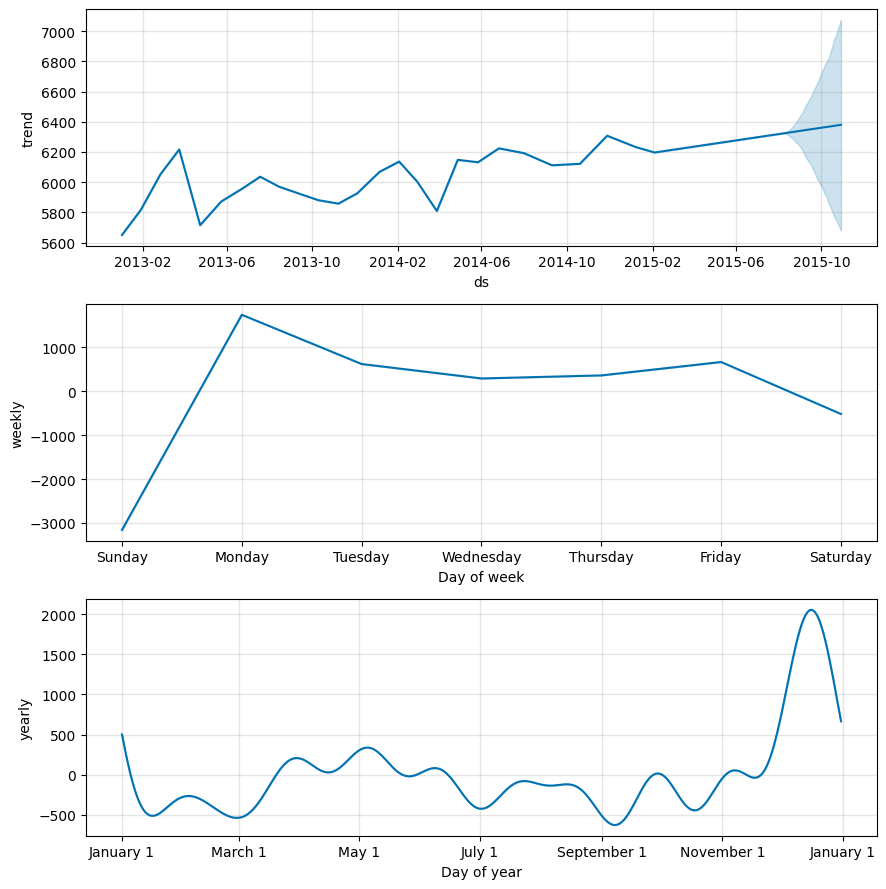

In [36]:
model.plot_components(forecast)
